# Sprint 8 - Ejercicios de Algoritmos de Agrupación


### Ejercicio 1

**Descarga el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilitzando el algoritmo de K-means.**

Lo primero que haremos será descargar el dataset, ver su composición, limpiarlo y analizarlo.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 


ruta_archivo = "C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 8 T1\\Publicacions Facebook Thailandia.csv"


df_tailand = pd.read_csv(ruta_archivo)
df_tailand.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
df_tailand.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df_tailand.shape

(7050, 16)

In [4]:
df_tailand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df_tailand["status_type"].value_counts()


photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [6]:
df_tailand["status_id"].value_counts()

819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: status_id, Length: 6997, dtype: int64

In [7]:
num_id_unicos= len(df_tailand["status_id"].value_counts())
print("Número de status_id únicos:", num_id_unicos)

Número de status_id únicos: 6997


Vamos a trabajar con un dataset inicial de 7050 registros y 16 columnas. De estas 16 columnas, las cuatro últimas están vacías, de manera que procederemos a eliminarlas. También he observado que hay tres columnas categorizadas como objetos. La primera es el identificador que debería ser único. De los 7050 registros 6997 son únicos. De manera que deberemos chequear los duplicados y eliminarlos. La segunda columna objeto es "status_type" esta se trata de una categoría que tiene 4 tipos diferentes de datos. Esta columna se debería pasar a categoría. Y la tercera es "status_published" esta columna hace referencia a la fecha de publicaión del post. Está compuesta por el mes/día/año/ y la hora. Creo que sería conveniente separala en dos columnas diferentes y asignarles el tipo fecha.

El dataset no contiene valores null. Ahora faltará ver si contiene valores NAN.

In [8]:
# Primero eliminamos las tres últimas columnas del dataset

df_tailand_1=df_tailand.drop(["Column1","Column2","Column3","Column4"],axis=1)
df_tailand_1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [9]:
# Segundo chequearemos los duplicados

duplicados = df_tailand_1[df_tailand_1.duplicated(keep=False)]
duplicados_ordenados = duplicados.sort_values(by="status_id")

duplicados_ordenados


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6172,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0
6171,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6170,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6175,819700534875473_997075427137982,status,6/1/2018 0:35,111,2,1,110,1,0,0,0,0
6225,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0
6174,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0
6173,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0


In [10]:
# Confirmamos que todas las columnas de los id duplicados son iguales. Procedemos a eliminar los duplicados

df_tailand_2=df_tailand_1.drop_duplicates()
df_tailand_2.shape

(6999, 12)

In [11]:
df_tailand_2["status_type"]=df_tailand_2["status_type"].astype("category")

In [12]:
df_tailand_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   status_id         6999 non-null   object  
 1   status_type       6999 non-null   category
 2   status_published  6999 non-null   object  
 3   num_reactions     6999 non-null   int64   
 4   num_comments      6999 non-null   int64   
 5   num_shares        6999 non-null   int64   
 6   num_likes         6999 non-null   int64   
 7   num_loves         6999 non-null   int64   
 8   num_wows          6999 non-null   int64   
 9   num_hahas         6999 non-null   int64   
 10  num_sads          6999 non-null   int64   
 11  num_angrys        6999 non-null   int64   
dtypes: category(1), int64(9), object(2)
memory usage: 663.2+ KB


In [13]:
# El próximo paso será separar la columna "status_published" en dos. 
#La primera en fecha y darle la categoría de date y la segunda en hora y darle categoría de time.

# Dividimos las columnas
df_tailand_2[["stat_pub_date", "stat_pub_time"]] = df_tailand_2["status_published"].str.split(' ', 1, expand=True)

# Convertimos la columna al tipo de datos datetime
df_tailand_2["stat_pub_date"] = pd.to_datetime(df_tailand_2["stat_pub_date"], format='%m/%d/%Y')

# Convertimos la columna 'Hora' al tipo de datos time
df_tailand_2["stat_pub_time"] = pd.to_datetime(df_tailand_2["stat_pub_time"], format='%H:%M').dt.time

df_tailand_2

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,2016-09-24,02:58:00
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,2016-09-23,11:19:00
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2016-09-21,23:03:00
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,2016-09-20,00:43:00


In [14]:
# Ahora eliminamos la columna "status_published"

df_tailand_3=df_tailand_2.drop(["status_published"], axis=1)
df_tailand_3

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,2016-09-24,02:58:00
7046,1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,2016-09-23,11:19:00
7047,1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,2016-09-21,23:03:00
7048,1050855161656896_1058663487542730,photo,351,12,22,349,2,0,0,0,0,2016-09-20,00:43:00


In [15]:
# El siguiente pasos es ver si el dataset contiene valores NAN

df_tailand_3.isna().sum()

status_id        0
status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
stat_pub_date    0
stat_pub_time    0
dtype: int64

Una vez que hemos limpiado y hecho las modificaciones pertinentes en nuestro dataset, es el momento de proceder a un pequeño análisis de los datos. Tambíen miraremos las distribuciones de los datos, si tienen outliers y si siguen una distribución normal.

In [16]:
df_tailand_3.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


ValueError: num must be an integer with 1 <= num <= 8, not 9

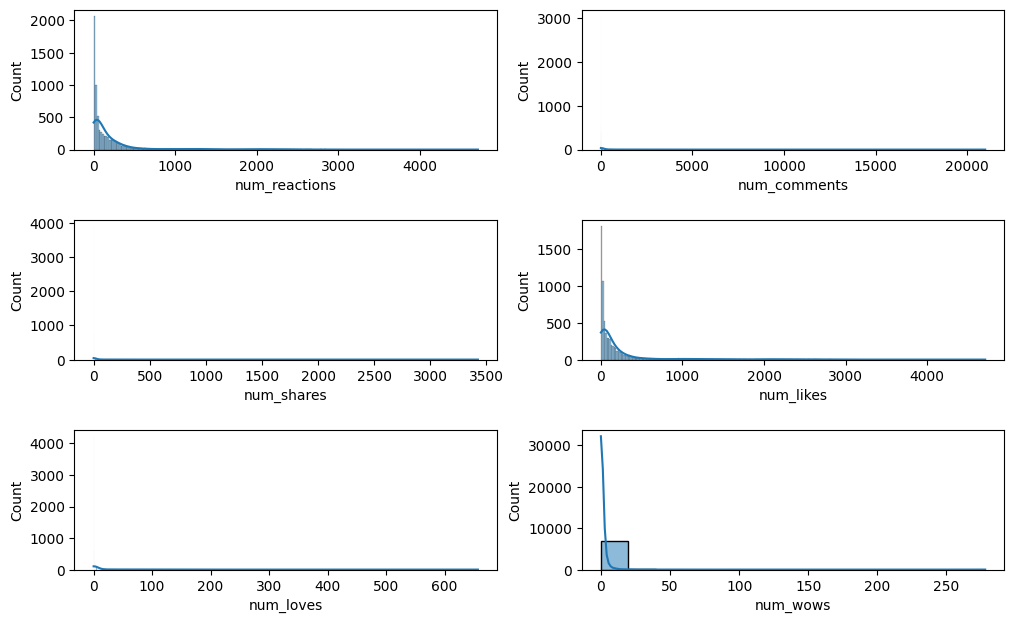

In [17]:
columns = df_tailand_3.columns.drop(["status_id","status_type","stat_pub_date","stat_pub_time"])

plt.figure(figsize=(12, 10))

for columna in columns:
  
    plt.subplot(4, 2, df_tailand_3.columns.get_loc(columna) + 1)
    sns.histplot(data=df_tailand_3[columna],kde=True)
    plt.xlabel(columna)
    
    plt.subplots_adjust(hspace=0.5)
    
plt.show

In [ ]:
plt.figure(figsize=(18, 12))

for columna in columns:
  
    plt.subplot(4, 2, df_tailand_3.columns.get_loc(columna) + 1)
    sns.boxplot(data=df_tailand_3[columna])
    plt.xlabel(columna)
    
plt.show

In [ ]:
# Miraremos si alguna variable sigue una distribución normal

from scipy.stats import shapiro
from tabulate import tabulate

# Creamos una lista para almacenar los resultados de la prueba
resultados = []

 
for columna in columns:
    stat, p = shapiro(df_tailand_3[columna])
        
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        resultado= "Probablemente sigue una distribución normal"
    else:
        resultado= "Probablemente no sigue una distribución normal"
        
    resultados.append([columna, stat, p, resultado])

# Imprimimos los resultados en formato tabular
tabla_resultados = tabulate(resultados, headers=["Columna", "stat", "p", "Resultado"], tablefmt="pretty")
print (tabla_resultados) 


Hemos comprobado que nuestras variables no seguían una distribución normal y además todas ellas contienen muchos outliers. 

Para poder aplicar un modelo K-Means es importante normalizar o estandarizar las características antes de aplicar el algoritmo debido a la sensibilidad a la escala de este.

Los próximos pasos que vamos a seguir son:

* 1- Hacer un test de robustez a las variables numéricas
* 2- Crear variables dummie para la variable categórica "status_type"
* 3- Hacer un PCA a las variables numéricas
* 4- Crear un nuevo dataframe que contenga las variables dummies de status_type y los valores de PCA. En este dataframe no será necesario añadir variables tales como "status_id" o las variables de fecha y tiempo.

In [22]:
# Hacemos el test de Robustez para las variables numéricas

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_tailand_3_scaled = df_tailand_3.copy()
df_tailand_3_scaled[columns] = scaler.fit_transform(df_tailand_3_scaled[columns])
df_tailand_3_scaled = df_tailand_3_scaled.round(4)

df_tailand_3_scaled



,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time
0,246675545449582_1649696485147474,video,2.3668,23.0909,65.50,2.2727,30.6667,3.0,1.0,1.0,0.0,2018-04-22,06:00:00
1,246675545449582_1649426988507757,photo,0.4623,-0.1818,0.00,0.5636,0.0000,0.0,0.0,0.0,0.0,2018-04-21,22:45:00
2,246675545449582_1648730588577397,video,0.8492,10.5455,14.25,0.8909,7.0000,1.0,1.0,0.0,0.0,2018-04-21,06:17:00
3,246675545449582_1648576705259452,photo,0.2663,-0.1818,0.00,0.3273,0.0000,0.0,0.0,0.0,0.0,2018-04-21,02:29:00
4,246675545449582_1645700502213739,photo,0.7789,-0.1818,0.00,0.8909,3.0000,0.0,0.0,0.0,0.0,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,0.1558,-0.1818,0.00,0.1939,0.0000,0.0,0.0,0.0,0.0,2016-09-24,02:58:00
7046,1050855161656896_1061334757275603,photo,-0.2111,-0.1818,0.00,-0.2606,0.3333,0.0,1.0,0.0,0.0,2016-09-23,11:19:00
7047,1050855161656896_1060126464063099,photo,-0.2814,-0.1818,0.00,-0.3394,0.3333,0.0,0.0,0.0,0.0,2016-09-21,23:03:00
7048,1050855161656896_1058663487542730,photo,1.4724,0.3636,5.50,1.7697,0.6667,0.0,0.0,0.0,0.0,2016-09-20,00:43:00


In [29]:
# Creamos variables dummie para la variable categórica "status_type" a través del Dummie Encoding

df_tailand_3_encoded = pd.get_dummies(df_tailand_3_scaled, columns=["status_type"],drop_first=True) #esto elimina la primera col

# Mostrar el DataFrame codificado
df_tailand_3_encoded



,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time,status_type_photo,status_type_status,status_type_video
0,246675545449582_1649696485147474,2.3668,23.0909,65.50,2.2727,30.6667,3.0,1.0,1.0,0.0,2018-04-22,06:00:00,0,0,1
1,246675545449582_1649426988507757,0.4623,-0.1818,0.00,0.5636,0.0000,0.0,0.0,0.0,0.0,2018-04-21,22:45:00,1,0,0
2,246675545449582_1648730588577397,0.8492,10.5455,14.25,0.8909,7.0000,1.0,1.0,0.0,0.0,2018-04-21,06:17:00,0,0,1
3,246675545449582_1648576705259452,0.2663,-0.1818,0.00,0.3273,0.0000,0.0,0.0,0.0,0.0,2018-04-21,02:29:00,1,0,0
4,246675545449582_1645700502213739,0.7789,-0.1818,0.00,0.8909,3.0000,0.0,0.0,0.0,0.0,2018-04-18,03:22:00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,0.1558,-0.1818,0.00,0.1939,0.0000,0.0,0.0,0.0,0.0,2016-09-24,02:58:00,1,0,0
7046,1050855161656896_1061334757275603,-0.2111,-0.1818,0.00,-0.2606,0.3333,0.0,1.0,0.0,0.0,2016-09-23,11:19:00,1,0,0
7047,1050855161656896_1060126464063099,-0.2814,-0.1818,0.00,-0.3394,0.3333,0.0,0.0,0.0,0.0,2016-09-21,23:03:00,1,0,0
7048,1050855161656896_1058663487542730,1.4724,0.3636,5.50,1.7697,0.6667,0.0,0.0,0.0,0.0,2016-09-20,00:43:00,1,0,0


In [30]:
# Eliminaremos del nuevo Dataset las columnas status_id, stat_pub_date y stat_pub_time

df_tailand_4=df_tailand_3_encoded.drop(["status_id","stat_pub_date","stat_pub_time"],axis=1)
df_tailand_4

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video
0,2.3668,23.0909,65.50,2.2727,30.6667,3.0,1.0,1.0,0.0,0,0,1
1,0.4623,-0.1818,0.00,0.5636,0.0000,0.0,0.0,0.0,0.0,1,0,0
2,0.8492,10.5455,14.25,0.8909,7.0000,1.0,1.0,0.0,0.0,0,0,1
3,0.2663,-0.1818,0.00,0.3273,0.0000,0.0,0.0,0.0,0.0,1,0,0
4,0.7789,-0.1818,0.00,0.8909,3.0000,0.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.1558,-0.1818,0.00,0.1939,0.0000,0.0,0.0,0.0,0.0,1,0,0
7046,-0.2111,-0.1818,0.00,-0.2606,0.3333,0.0,1.0,0.0,0.0,1,0,0
7047,-0.2814,-0.1818,0.00,-0.3394,0.3333,0.0,0.0,0.0,0.0,1,0,0
7048,1.4724,0.3636,5.50,1.7697,0.6667,0.0,0.0,0.0,0.0,1,0,0


In [ ]:
# Ahora procederemos con el PCA